In [66]:
#Librerias
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler  
from sklearn.svm import SVC 
from sklearn.metrics import classification_report, confusion_matrix  

In [68]:
# Cargamos el conjunto de datos y visualizamos
df = pd.read_csv('DSCancerDeMamaSinDatosPerdidos.csv', sep=';')

In [70]:
df.head(10)

,BIRADS,Age,Shape,Margin,Density,Severity
0,5,67,3,5,3,1
1,5,58,4,5,3,1
2,4,28,1,1,3,0
3,5,57,1,5,3,1
4,5,76,1,4,3,1
5,3,42,2,1,3,1
6,4,36,3,1,2,0
7,4,60,2,1,2,0
8,4,54,1,1,3,0
9,3,52,3,4,3,0


In [72]:
# Mostramos la cantidad de casos de cada clase en la columna 'Resultado'
df.groupby('Severity').size()

Severity
0    425
1    395
dtype: int64

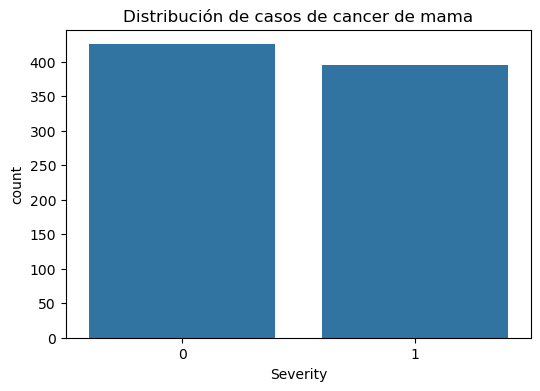

In [74]:
# Gráfico de conteo
plt.figure(figsize=(6,4))
sns.countplot(x='Severity', data=df)
plt.title('Distribución de casos de cancer de mama')  # Título del gráfico
plt.show() 

In [76]:
#Separaramos X e Y
X = df.drop('Severity', axis=1).values
y = df['Severity'].values

In [78]:
#Normalizamos los datos para mejorar el rendimiento del modelo
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [80]:
#Separamos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=30)

In [82]:
# Creamos el modelo SVM con un kernel lineal
model = SVC(probability=True, kernel='linear', random_state=42) # SVM con kernel lineal

In [84]:
# Entrenamos el modelo SVM
model.fit(X_train, y_train)

SVC(kernel='linear', probability=True, random_state=42)

In [86]:
# Realizamos predicciones en el conjunto de prueba
y_pred = model.predict(X_test)

# Mostramos la matriz de confusión
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()  # Aquí usamos y_pred, no predicciones
labels = ["No Cardiopatía", "Cardiopatía"]
matriz = confusion_matrix(y_test, y_pred, labels=[0, 1])  # Aquí también usamos y_pred
print("\nMatriz de confusión:")
print(pd.DataFrame(matriz, index=labels, columns=labels))

# Mostramos el reporte de clasificación
clasificadores = ["No Cardiopatía", "Cardiopatía"]  # Esto ya estaba bien
print("\nReporte de clasificación:")
print(classification_report(y_test, y_pred, target_names=clasificadores))


Matriz de confusión:
                No Cardiopatía  Cardiopatía
No Cardiopatía             112            7
Cardiopatía                 35           92

Reporte de clasificación:
                precision    recall  f1-score   support

No Cardiopatía       0.76      0.94      0.84       119
   Cardiopatía       0.93      0.72      0.81       127

      accuracy                           0.83       246
     macro avg       0.85      0.83      0.83       246
  weighted avg       0.85      0.83      0.83       246



In [101]:
# Ejemplo de predicción para el modelo de SVM
# Datos de ejemplo: [Edad, Sexo, Tipo_Dolor_Pecho, Presion_Arterial, Colesterol, 
# Nivel_Azucar_Ayunas, Res_Electrocardiografico, Frecuencia_Cardiaca, 
# Angina_Inducida, DepresionST, DepresionST_Pendiente, NumeroVasos, Prueba_Tálio]
ejemplo = [[3, 60, 5, 3, 5]]

# Normalizamos el ejemplo
ejemplo_scaled = scaler.transform(ejemplo)

# Predicción
print("\nPredicción para el ejemplo con SVM:")
prediccion_svm = model.predict(ejemplo_scaled)  # Realizamos la predicción con el modelo SVM
print(f"Predicción: {prediccion_svm[0]}")  # Mostramos la predicción binaria (0 o 1)

# Probabilidades
print("Probabilidades de cada clase:")
print(model.predict_proba(ejemplo_scaled))


Predicción para el ejemplo con SVM:
Predicción: 0
Probabilidades de cada clase:
[[0.98174548 0.01825452]]


In [103]:
import pickle

# Guarda el modelo SVM
with open('modelo_svm.pkl', 'wb') as f:
    pickle.dump(model, f)

# Guarda el scaler
with open('scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)

# Guarda las columnas
columnas = df.drop('Severity', axis=1).columns.tolist()
with open('columnas.pkl', 'wb') as f:
    pickle.dump(columnas, f)